In [ ]:
import math
from tqdm import tqdm
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt
import operator
import functools
from games import *


100%|██████████| 1000/1000 [00:32<00:00, 30.61it/s]


ValueError: 'c' argument has 1000 elements, which is inconsistent with 'x' and 'y' with size 666.

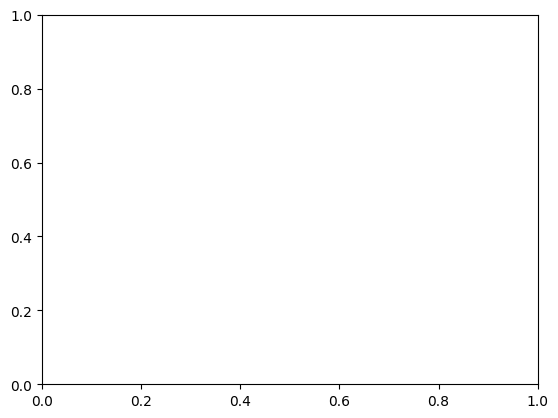

In [51]:

# NUMBER OF STRATEGIES AND GAME SIZE IS HARDCODED TO FOR NOW (TO 2x2)
pure_strategies_2b2 = [[0, 1], [1, 0]]

# prisoners' dilemma
pd = nash.Game(np.array([[3, 0], [5, 1]]), np.array([[3, 5], [0, 1]]))


def welf_regret(game):
    # nash equilibria
    eqs = list(game.support_enumeration())

    # list of expected utilities for both players for pure strategies
    pure_outcomes = [game[s_row, s_col]
                     for s_row in pure_strategies_2b2 for s_col in pure_strategies_2b2]

    # list of expected utilities for both players in nash equilibria
    equil_outcomes = [game[s_row, s_col]
                      for (s_row, s_col) in eqs]

    # we only need to check pure strategies because the maximum is
    # necessarily among these
    max_strat = np.max(list(map(sum, pure_outcomes)))

    min_in_equil = np.min(list(map(sum, equil_outcomes)))

    return max_strat - min_in_equil


def welf_regret_returns_eqs(game):
    # nash equilibria
    eqs = list(game.support_enumeration())

    # list of expected utilities for both players for pure strategies
    pure_outcomes = [game[s_row, s_col]
                     for s_row in pure_strategies_2b2 for s_col in pure_strategies_2b2]

    # list of expected utilities for both players in nash equilibria
    equil_outcomes = [game[s_row, s_col]
                      for (s_row, s_col) in eqs]

    # we only need to check pure strategies because the maximum is
    # necessarily among these
    max_strat = np.max(list(map(sum, pure_outcomes)))

    min_in_equil = np.min(list(map(sum, equil_outcomes)))

    return max_strat - min_in_equil, pure_outcomes, equil_outcomes, eqs


def welf_regret_returns_relative(game):
    # nash equilibria
    eqs = list(game.support_enumeration())

    # list of expected utilities for both players for pure strategies
    pure_outcomes = [game[s_row, s_col]
                     for s_row in pure_strategies_2b2 for s_col in pure_strategies_2b2]

    # list of expected utilities for both players in nash equilibria
    equil_outcomes = [game[s_row, s_col]
                      for (s_row, s_col) in eqs]

    # we only need to check pure strategies because the maximum is
    # necessarily among these
    max_strat = np.max(list(map(sum, pure_outcomes)))

    min_in_equil = np.min(list(map(sum, equil_outcomes)))
    min_overall = np.min(list(map(sum, pure_outcomes)))

    return (max_strat - min_in_equil)/(max_strat - min_overall)


def product_welf_regret_returns_relative(game):
    # nash equilibria
    eqs = list(game.support_enumeration())

    # list of expected utilities for both players for pure strategies
    pure_outcomes = [game[s_row, s_col]
                     for s_row in pure_strategies_2b2 for s_col in pure_strategies_2b2]

    # list of expected utilities for both players in nash equilibria
    equil_outcomes = [game[s_row, s_col]
                      for (s_row, s_col) in eqs]

    # we only need to check pure strategies because the maximum is
    # necessarily among these
    max_strat = np.max(list(functools.reduce(operator.mul, pure_outcomes, 1)))

    min_in_equil = np.min(
        list(functools.reduce(operator.mul, equil_outcomes, 1)))
    min_overall = np.min(
        list(functools.reduce(operator.mul, pure_outcomes, 1)))
    return (max_strat - min_in_equil)/(max_strat - min_overall)


def product_welf_regret(game):
    # nash equilibria
    eqs = list(game.support_enumeration())

    # list of expected utilities for both players for pure strategies
    pure_outcomes = [game[s_row, s_col]
                     for s_row in pure_strategies_2b2 for s_col in pure_strategies_2b2]

    # list of expected utilities for both players in nash equilibria
    equil_outcomes = [game[s_row, s_col]
                      for (s_row, s_col) in eqs]

    # we only need to check pure strategies because the maximum is
    # necessarily among these
    max_strat = np.max(list(functools.reduce(operator.mul, pure_outcomes, 1)))
    min_in_equil = np.min(
        list(functools.reduce(operator.mul, equil_outcomes, 1)))

    return max_strat - min_in_equil


def princ_welf_regret(principal_game, agents_game):
    # nash equilibria
    eqs = list(agents_game.support_enumeration())

    # list of expected utilities for both PRINCIPALS for pure strategies
    pure_outcomes = [principal_game[s_row, s_col]
                     for s_row in pure_strategies_2b2 for s_col in pure_strategies_2b2]

    # list of expected utilities for both PRINCIPALS in nash equilibria of AGENT GAME
    equil_outcomes = [principal_game[s_row, s_col]
                      for (s_row, s_col) in eqs]

    # we only need to check pure strategies because the maximum is
    # necessarily among these
    max_strat = np.max(list(map(sum, pure_outcomes)))

    min_in_equil = np.min(list(map(sum, equil_outcomes)))

    return max_strat - min_in_equil


def dist_scale(rho):
    return math.sqrt(1-rho) * math.sqrt(1/2)


def epic_horiz(game):
    # for measuring horizontal alignment
    row_payoffs = game.payoff_matrices[0]
    col_payoffs = game.payoff_matrices[1]

    # note: uniform distribution assumed
    matrix_coeffs = np.corrcoef([row_payoffs.flatten(), col_payoffs.flatten()])

    return dist_scale(matrix_coeffs[0][1])


def epic_vertic(principal_game, agents_game):
    # for measuring vertical alignment

    row_payoffs = principal_game.payoff_matrices[0]
    col_payoffs = principal_game.payoff_matrices[1]

    agent_row_payoffs = agents_game.payoff_matrices[0]
    agent_col_payoffs = agents_game.payoff_matrices[1]

    # note: uniform distribution assumed
    row_matrix_coeffs = np.corrcoef(
        [row_payoffs.flatten(), agent_row_payoffs.flatten()])
    col_matrix_coeffs = np.corrcoef(
        [col_payoffs.flatten(), agent_col_payoffs.flatten()])
    return (dist_scale(row_matrix_coeffs[0][1]), dist_scale(col_matrix_coeffs[0][1]))


def max_min_normalise(data: np.array) -> np.array:
    return (data-np.min(data))/(np.max(data)-np.min(data))


"""
WELF REGRET vs HORIZONTAL ALIGNMENT 

everything else constant
"""


def welf_regr_vs_horiz_align():
    # vertical alignment set to 1 by making principal game = agent game
    # epsilon = 1, so we consider simple NEs

    # sample row & col payoffs from uniform distribution [0,1]
    # min-max normalise these between [0,1]
    normalised_utilities_row = max_min_normalise(
        np.random.uniform(0, 25, size=(2, 2)))
    # max_min_normalise(np.random.uniform(0, 20000, size=(2, 2)))

    normalised_utilities_col = max_min_normalise(
        np.random.uniform(0, 25, size=(2, 2)))
    # max_min_normalise(np.random.uniform(0, 250, size=(2, 2)))

    # for our purposes G = G'
    game = nash.Game(normalised_utilities_row, normalised_utilities_col)

    # note: in this case, principals_welf_regret = welf_regret
    # return (welf_regret_returns_eqs(game), welf_regret_returns_relative(game), epic_horiz(game), game)
    return (product_welf_regret(game), product_welf_regret_returns_relative(game), epic_horiz(game))


def plot_iterations_ha(num_iterations):
    # plots num_iterations of welfare regret vs. horizontal alignment
    x_axis = []
    y_axis = []
    y2_axis = []

    for i in tqdm(range(num_iterations)):
        # (welf_regret, pure, exp,
        #  eqs), rel_welf, horiz_align, game = welf_regr_vs_horiz_align()
        welf_regret, rel_welf, horiz_align = welf_regr_vs_horiz_align()

        x_axis.append(horiz_align)
        y_axis.append(welf_regret)
        y2_axis.append(rel_welf)

    plt.scatter(x_axis, y_axis, marker="x", s=10)
    plt.xlabel('Distance from Horizontal Alignment')
    plt.ylabel('Principals\' Welfare Regret')
    plt.title('Random sample of games (uniform between [0,1])')
    plt.show()

    plt.scatter(x_axis, y2_axis, marker="x", s=10)
    plt.xlabel('Distance from Horizontal Alignment')
    plt.ylabel('Principals\' RELATIVE Welfare Regret')
    plt.title('Random sample of games (uniform between [0,1])')
    plt.show()


"""
WELF REGRET vs VERTICAL ALIGNMENT 

everything else constant
"""


def welf_regr_vs_vertic_align():
    # horizontal alignment set to 1 as row utilities = col utilities

    # sample payoffs from uniform distribution [0,1]
    # min-max normalise these between [0,1]
    normalised_utilities_principals = max_min_normalise(np.random.uniform(0, 1, size=(2, 2)))

    normalised_utilities_agents = max_min_normalise(np.random.uniform(0, 1, size=(2, 2)))

    principal_game = nash.Game(normalised_utilities_principals, normalised_utilities_principals)
    agent_game = nash.Game(normalised_utilities_agents, normalised_utilities_agents)

    n_eqs = len(list(agent_game.support_enumeration())) #TODO is this taking eqs from a correct game?

    return (princ_welf_regret(principal_game, agent_game), epic_vertic(principal_game, agent_game), welf_regret(agent_game) == 0, n_eqs)


def welf_regr_vs_single_vertic_align():
    # horizontal alignment kept at 1 by making row_agent = col_agent = col_principal

    # sample payoffs from uniform distribution [0,1]
    # min-max normalise these between [0,1]
    normalised_utilities_principals = max_min_normalise(np.random.uniform(0, 1, size=(2, 2)))

    normalised_utilities_agent = max_min_normalise(np.random.uniform(0, 1, size=(2, 2)))

    principal_game = nash.Game(normalised_utilities_principals, normalised_utilities_agent)

    # only row agent is misaligned
    agent_game = nash.Game(normalised_utilities_agent, normalised_utilities_agent)
    row, col = epic_vertic(principal_game, agent_game)

    n_eqs = len(list(principal_game.support_enumeration()))

    return (princ_welf_regret(principal_game, agent_game), row, welf_regret(agent_game) == 0, n_eqs)


def plot_iterations_va(num_iterations, double: bool):
    # plots num_iterations of welfare regret vs. vertical alignment of both players
    x_axis = []
    y_axis = []
    a_eqs = []

    for i in tqdm(range(num_iterations)):
        if double:
            welf_regret, vertic_align, hcc, n_eqs = welf_regr_vs_vertic_align()
            a_eqs.append(n_eqs)

            row_align, col_align = vertic_align
            x_axis.append(row_align)

        else:
            welf_regret, vertic_align, hcc, n_eqs = welf_regr_vs_single_vertic_align()
            a_eqs.append(n_eqs)
            x_axis.append(vertic_align)

        y_axis.append(welf_regret)


    color_values = ["r" if e == 1 else "b" for e in a_eqs]
    plt.scatter(x_axis, y_axis, c=color_values, marker="x", s=10, alpha=0.5)
    if double:
        plt.xlabel('Distance from Vertical Alignment of both principal-agent pairs')

    else:
        plt.xlabel('Distance from Vertical Alignment')
    plt.ylabel('Principals\' Welfare Regret')
    plt.title('Random sample of games (uniform between [0,1])')
    plt.show()


def plot_iterations_va_hcc(num_iterations, double: bool):
    # plots num_iterations of welfare regret vs. vertical alignment of both players
    # only plots games where horizontal welfare regret = 0
    x_axis = []
    y_axis = []
    a_eqs = []

    for i in tqdm(range(num_iterations)):
        if double:
            welf_regret, vertic_align, horiz_cap, n_eqs = welf_regr_vs_vertic_align()

            row_align, col_align = vertic_align
            if horiz_cap:
                a_eqs.append(n_eqs)
                x_axis.append(row_align)
        else:
            welf_regret, vertic_align, horiz_cap, n_eqs = welf_regr_vs_single_vertic_align()
            
            if horiz_cap:
                a_eqs.append(n_eqs)
                x_axis.append(vertic_align)
        if horiz_cap:
            y_axis.append(welf_regret)

    color_values = ["r" if e == 1 else "b" for e in a_eqs]
    plt.scatter(x_axis, y_axis, c=color_values, marker="x", s=10)
    if double:
        plt.xlabel('Distance from Vertical Alignment of both principal-agent pairs')

    else:
        plt.xlabel('Distance from Vertical Alignment')
    plt.ylabel('Principals\' Welfare Regret')
    plt.title('HC controlled sandom sample of games')
    plt.show()


# plot_iterations_ha(1000)
# plot_iterations_va(10000, True)
# plot_iterations_va(10000, False)
plot_iterations_va_hcc(1000, True)
# plot_iterations_va_hcc(1000, False)


ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

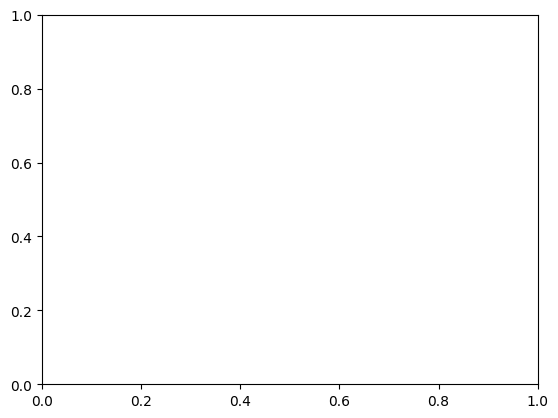

In [53]:
# FUNCTION FOR UPPER BOUND (HOPEFULLY)
def plot_upperbound():
    welf_regret, vertic_align, horiz_cap, n_eqs = welf_regr_vs_vertic_align()
    
    x = np.linspace(0, 10, 100)
    y = welf_regret <= 4 * np.sqrt(2) * (vertic_align + (np.sqrt(2) - 1))

    plt.plot(x, y)
    plt.show()

plot_upperbound()